# **MÓDULO 17 : Projeto de Credit Score**
### **Processamento dos dados & Balanceamento da Base de Treino vs2**


O termo *"credit score"* é uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O credit score tem como objetivo prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Ou seja, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

Nesta versão, a codificação do crédit score será para cada categoria. High=3,medium=2,low=1

### Objetivo Geral
Organizar a base de dados para o desenvolvimento de modelo de previsão de Credit Score. Para isso, realizaremos alguma etapas para este processamento conforme descrito abaixo.

#### Etapa 1
* Verificar tipos de dados;
* Identificar e tratar valores ausentes com justificativa da abordagem;
* Analisar a consistência das variaveis categoricas(Mistyping e redundancias)
#### Etapa 2
* Análise Univariadas 
* Avaliação da distribuição das Variaveis Categóricas
* Investigação de outliers 
* Análise Bivariadas 
#### Etapa 3
* Correlação numérica
* Codificação das variaveis categóricas vs2
* Separação de base de treino e teste
* Balanceamento

Legenda dos dados:

*   **Age** : Idade 

*   **Income** : Renda

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Estado civil.

*   **Number of Children** : número de Filhos.

*   **Home** : Imóvel

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


In [32]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import sklearn

from scipy.stats import shapiro, skew, kurtosis
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from scipy.stats import linregress
import warnings

#alertas
warnings.simplefilter(action='ignore', category=FutureWarning)

# Leitura inicial dos dados
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')
df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


### Etapa 1:
>**a)** Verificar e ajustar os tipos de dados conforme necessário.\
>**b)** Identificar e tratar valores ausentes com justificativa da abordagem.\
>**c)** Corrigir erros em variáveis categóricas para garantir a consistência dos dados.

#### **a)** Tipos de dados

Os tipos e dimensão dos dados são apresentados na **Tabela 1**. 

| # | Column              | Non-Null Count | Dtype   |
|---|---------------------|----------------|---------|
| 0 | Age                 | 130 non-null   | float64 |
| 1 | Gender              | 164 non-null   | object  |
| 2 | Income              | 164 non-null   | object  |
| 3 | Education           | 164 non-null   | object  |
| 4 | Marital Status      | 164 non-null   | object  |
| 5 | Number of Children  | 164 non-null   | int64   |
| 6 | Home Ownership      | 164 non-null   | object  |
| 7 | Credit Score        | 164 non-null   | object  |
**Tabela 1**

#### **b)** Valores Ausentes
Todas as colunas do conjunto de dados possuem 164 valores não nulos, com exceção da coluna *idade*, que contém 130 valores não nulos. Utilizando a função describe(), avaliamos suas estatísticas descritivas.A média (37.51) e a mediana (36) são valores relativamente próximos, sugerindo uma distribuição aproximadamente centralizada. No entanto, os valores mínimo (25) e máximo (53) não estão perfeitamente equilibrados em torno da média, o que pode indicar a presença de assimetria na distribuição. Além disso, a diferença entre os quartis (Q3 - Q1 = 15) reforça que os dados não seguem uma distribuição perfeitamente simétrica. Os dados não nulos representam 79% dos dados válidos. ou seja, 21% dos dados deveriam ser descartatos. Se optassemos por substituir esses pelos dados da média ou mediana, iria acrescentar uma véis muito forte(~20%). Então decidimos retirar uma amostra aleatória de 34 valores(21%) e substituir pelos dados ausentes. As linhas abaixo mostram o procedimento.  A **Tabela 2** resume a estatística com essa abordagem.
```python
#atribuição de valores aleatórios em df['Age']
np.random.seed(31) #semente randomica
N_nan = df['Age'].isnull().sum() #total de elementos nulos
sample = np.random.choice(df['Age'].dropna(), size=N_nan, replace=False) # retirar valores aleatórios de df['Age']
df.loc[df['Age'].isnull(), 'Age'] = sample  # alocar sample no dataframe
```

| Estatística | Valor  | Novo Valor( add +34)  |
|-------------|--------|:---:|
| **Amostra (n)** | 130  |164|
| **Média (Mean)** | 37.51  |37.38|
| **Desvio Padrão (Std)** | 8.50   |8.56|
| **Mínimo (Min)** | 25.00  |25|
| **Mediana (Q2)** | 36.00  |36|
| **Máximo (Max)** | 53.00  |53|
| **1º Quartil (Q1)** | 30.00  |30|
| **3º Quartil (Q3)** | 45.00  |45|
| **Intervalo Interquartil (IQR = Q3 - Q1)** | 15.00  |15|
**Tabela 2**

#### **c)** Consistência das variaveis categoricas
Verificamos que todos os dados categoricos não apresentam erros de digitação ou redundancia de informação. Além disso as colunas *Gênero*,*estado civil*,*Imóvel* possuem apenas 2 categorias, o que possibilita uma fácil mudança para numeros inteiros através da tecnica *Label Encoding*. A **Tabela 3** apresenta os dados categoricos de nossa base de dados. Por fim, observamos que os dados da coluna *Renda*, estavam disponiveis com string, assim foi realizado a transformação para float. Todos os termos forma traduzidos.

| Coluna       | Categorias                                           | Total |
|----------------------|------------------------------------------------------|------|
| Gênero              | Feminino, Masculino                                   | 2    |
| Escolaridade        | Ensino Médio, Tecnólogo, Graduação, Mestrado, Doutorado | 5    |
| Estado Civil        | Solteiro, Casado                                      | 2    |
| Propriedade do Imóvel | Alugado, Próprio                                    | 2    |
| Score de Crédito    | Alto, Médio, Baixo                                   | 3    |
**Tabela 3:** Colunas e suas categorias traduzidas

In [33]:
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

#substituido
np.random.seed(312) #semente randomica
N_nan = df['Age'].isnull().sum() #total de elementos nulos
sample = np.random.choice(df['Age'].dropna(), size=N_nan, replace=False) # retirar valores aleatórios de df['Age']
df.loc[df['Age'].isnull(), 'Age'] = sample  # alocar sample no dataframe
df['Age']=df['Age'].astype(int)             #transformar em inteiros

#Transformando df['Income'] de string em float
df['Income'] = (
     df['Income']
     .str.replace('.', '', regex=False)  
     .str.replace(',', '.', regex=False)  
      .astype(float))

print(df.info())
print(df[['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']].apply(pd.Series.unique))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 164 non-null    int64  
 1   Gender              164 non-null    object 
 2   Income              164 non-null    float64
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 10.4+ KB
None
Gender                                               [Female, Male]
Education         [Bachelor's Degree, Master's Degree, Doctorate...
Marital Status                                    [Single, Married]
Home Ownership                                      [Rented, Owned]
Credit Score                                   [High, Average, Low

In [35]:
# Codificação 

# Genero       : Female=0,Male=1
# estado civil : single=0,Married=1
# Imóvel   : rented=0,Owned=1

# Label Enconder
label_enconder = LabelEncoder()

df['Gender_cod'] = label_enconder.fit_transform(df['Gender'])
df = df.drop(['Gender'], axis=1)

df['Marital_Status_cod'] = label_enconder.fit_transform(df['Marital Status'])
df = df.drop(['Marital Status'], axis=1)
df['Marital_Status_cod'] = df['Marital_Status_cod'].replace({0: 1, 1: 0})

df['Home_Ownership_cod'] = label_enconder.fit_transform(df['Home Ownership'])
df = df.drop(['Home Ownership'], axis=1)
df['Home_Ownership_cod'] = df['Home_Ownership_cod'].replace({0: 1, 1: 0})

# One-Hot Encoding 
#Education (True or false) 
df = pd.get_dummies(df,columns=['Education'],prefix='Edu') 
#Credit Score (True or false) 

# Low=0, Average=1, High=2 
#df['Credit_Score_N'] = df['Credit Score'].map({'Low': 0, 'Average': 1, 'High': 2})

#df = pd.get_dummies(df,columns=['Credit Score'],prefix='Score') 

#convertendo Boleanos para zero ou 1
df[df.select_dtypes(include='bool').columns] = df.select_dtypes(include='bool').astype(int)
#df2=df
#df2.drop('Credit Score',axis=1)
#df2

In [36]:
df2=df
#df2 = df2.drop(['Credit Score'], axis=1)
df2

,Age,Income,Number of Children,Credit Score,Gender_cod,Marital_Status_cod,Home_Ownership_cod,Edu_Associate's Degree,Edu_Bachelor's Degree,Edu_Doctorate,Edu_High School Diploma,Edu_Master's Degree
0,25,50000.0,0,High,0,0,0,0,1,0,0,0
1,30,100000.0,2,High,1,1,1,0,0,0,0,1
2,35,75000.0,1,High,0,1,1,0,0,1,0,0
3,40,125000.0,0,High,1,0,1,0,0,0,1,0
4,45,100000.0,3,High,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
159,29,27500.0,0,Low,0,0,0,0,0,0,1,0
160,34,47500.0,0,Average,1,0,0,1,0,0,0,0
161,39,62500.0,2,High,0,1,1,0,1,0,0,0
162,44,87500.0,0,High,1,0,1,0,0,0,0,1


In [37]:
#reorndenação da colunas ( organizar ordem de disposição)

#  Índices das colunas  escolaridade
col = df2.columns.tolist()
id1 = col.index("Edu_Associate's Degree") 
id2 = col.index("Edu_Bachelor's Degree") 
id3 = col.index('Edu_Doctorate') 
id4 = col.index('Edu_High School Diploma') 
id5 = col.index("Edu_Master's Degree") 



col[id1], col[id2],col[id3],col[id4],col[id5]=col[id4],col[id1],col[id2],col[id5],col[id3]
df2 = df2[col]

cs = df2.pop("Credit Score")
df2['Credit Score'] = cs
df2

,Age,Income,Number of Children,Gender_cod,Marital_Status_cod,Home_Ownership_cod,Edu_High School Diploma,Edu_Associate's Degree,Edu_Bachelor's Degree,Edu_Master's Degree,Edu_Doctorate,Credit Score
0,25,50000.0,0,0,0,0,0,0,1,0,0,High
1,30,100000.0,2,1,1,1,0,0,0,1,0,High
2,35,75000.0,1,0,1,1,0,0,0,0,1,High
3,40,125000.0,0,1,0,1,1,0,0,0,0,High
4,45,100000.0,3,0,1,1,0,0,1,0,0,High
...,...,...,...,...,...,...,...,...,...,...,...,...
159,29,27500.0,0,0,0,0,1,0,0,0,0,Low
160,34,47500.0,0,1,0,0,0,1,0,0,0,Average
161,39,62500.0,2,0,1,1,0,0,1,0,0,High
162,44,87500.0,0,1,0,1,0,0,0,1,0,High


#### F) Separação da base em treino e teste

Definimos como alvo (target) para aprendizado a variável *Credit_Score_N*,  Para a variável X são todas as demais. Assim conhecer duas delas automaticamente define a terceira, comprometendo a capacidade de generalização do modelo de aprendizagem. A variáveis x e y ficaram definidas conforme descrito no código abaixo.

```python
x = df2.drop(['Credit Score'], axis=1) 
y = df2['Credit Score'] # previsão de Score Alto!
```


In [38]:
x = df2.drop(['Credit Score'], axis=1) 
y = df2['Credit Score'] # previsão de Score Alto!
print(f"Tamanho de x: {x.shape}")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

print(f"Base de Treino (feat): {x_train.shape}")
print(f"Base de Teste  (feat): {x_test.shape}")
print(f"Base de Treino (tag ): {y_train.shape}")
print(f"Base de Teste  (tag ): {y_test.shape}")

Tamanho de x: (164, 11)
Base de Treino (feat): (123, 11)
Base de Teste  (feat): (41, 11)
Base de Treino (tag ): (123,)
Base de Teste  (tag ): (41,)


#### G e H )Balanceamento
Os dados não estão balanceados. O alvo de aprendizagem está em 68% dos dados portanto enviesando o modelo a esta condição. Para equilibrar os valores usamos a técnica e por conta da diferença apresentada, usamosa a técnica smote (Synthetic Minority Over-sampling Technique) o que criará novos dados, usando os dados de treino, para valores miniritáios, em nosso caso, a condição de negativa a score alto. A **Tabela 8** apresenta os valores e percentuais para base de dados, base de treino e base de treino pós balanceamento.

| Score_High | Base de dados |Base de treino |Base treino Balanceada | 
|------------|:----------------:|:--------------:|:----------------:|
| 1          | 113 (68.90%)     | 84 (68.29%)|    84 (50%)          | 
| 0         | 51    ( 31.09%)    | 39 (31.70%)|   84 (50%)          | 
**Tabela 8**

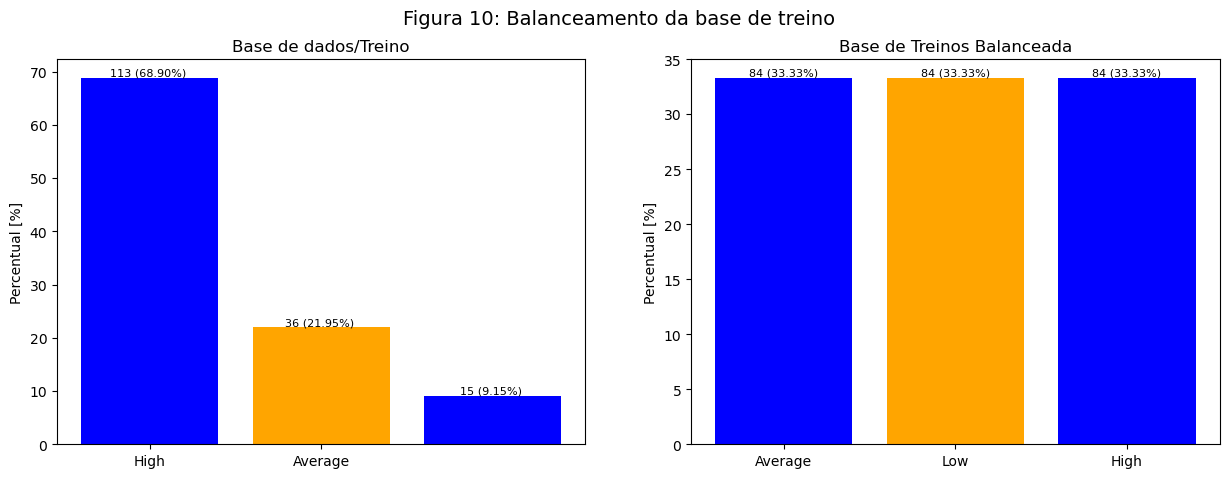

In [39]:
#Balanceamento
#Base de dados
B0 = df2['Credit Score'].value_counts(normalize=True)*100 # na base de dados
B0c = df2['Credit Score'].value_counts() # na base de dados

#Balancemento da Base de treino
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)
B1=y_train_balanced.value_counts(normalize=True) * 100
B1c=y_train_balanced.value_counts()

# figura : subplot balancemento
fig, ax = plt.subplots(1, 2, figsize=(15, 5))  # 1 linha, 3 colunas, tamanho da figura
fig.suptitle('Figura 10: Balanceamento da base de treino', fontsize=14)
ax[0].bar(B0.index, B0.values,color=['blue', 'orange'])
ax[0].set_title('Base de dados/Treino')
ax[0].set_xticks(np.arange(0,2,1))
ax[0].set_ylabel('Percentual [%]')
for i in range(3):
    ax[0].text(B0.index[i], B0.values[i] , f'{B0c.values[i]} ({B0.values[i]:.2f}%) ' , ha='center', va='bottom', fontsize=8)
    
ax[1].bar(B1.index, B1.values,color=['blue', 'orange'])
ax[1].set_title('Base de Treinos Balanceada')
ax[1].set_xticks(np.arange(0,3,1))
ax[1].set_ylabel('Percentual [%]')

for i in range(3):
    ax[1].text(B1.index[i], B1.values[i] , f'{B1c.values[i]} ({B1.values[i]:.2f}%)', ha='center', va='bottom', fontsize=8)


In [40]:
#Salvamento dos dados
#Dados Balanceados
df_trainB=pd.concat([x_train_balanced, y_train_balanced], axis=1)
df_trainB.to_csv('CREDIT_SCORE_PROJETO_PARTE1_TRAINED_BALANCED_vs2.csv', index=False)
df_trainB

df_test=pd.concat([x_test, y_test], axis=1)
df_test.to_csv('CREDIT_SCORE_PROJETO_PARTE1_TEST_BASE_vs2.csv', index=False)

In [41]:
for i in range(250):
    print(y_train_balanced[i])


Average
Low
Average
Average
Average
High
High
High
Average
High
High
High
Average
Average
High
High
Average
High
Low
High
High
High
High
High
Average
High
High
Low
High
Average
High
High
High
High
High
High
High
Average
High
High
High
Low
High
Average
High
Low
High
Low
High
Average
Low
High
Average
High
Average
High
High
Average
High
Low
High
Average
High
High
High
Average
Average
High
High
High
Average
High
High
Average
High
High
High
Low
Average
High
High
High
High
Average
High
High
High
High
High
High
High
High
High
Average
High
High
High
Average
Average
High
High
High
High
High
High
Average
High
High
High
High
High
Average
High
High
Average
High
High
High
High
Average
High
High
High
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
Average
